In [61]:
#Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as st


In [36]:
df = pd.read_csv('supermarket_sales.csv')

In [33]:
#Информация о датасете
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [34]:
#Срез данных
print(df.describe())


        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875   

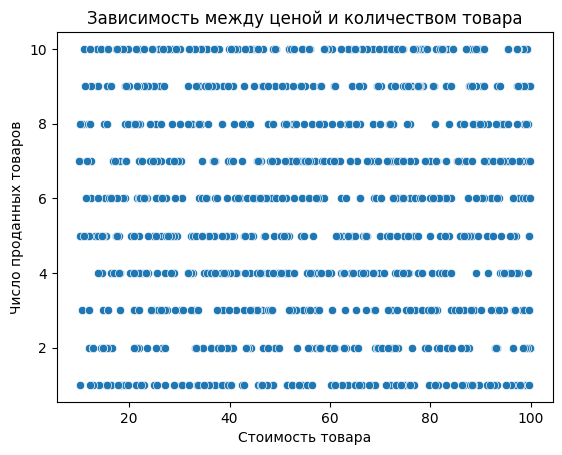

In [35]:
#Поиск закономерностей между Unit price и Quantity. Диаграмма рассеяния
sb.scatterplot(data=df,x=df['Unit price'], y= df['Quantity'])
plt.title('Зависимость между ценой и количеством товара')
plt.xlabel('Стоимость товара')
plt.ylabel('Число проданных товаров')
plt.show()


По графику видно, что отсутсвует явная закономерность - точки распределены по всему графику без явной линии или тренда.

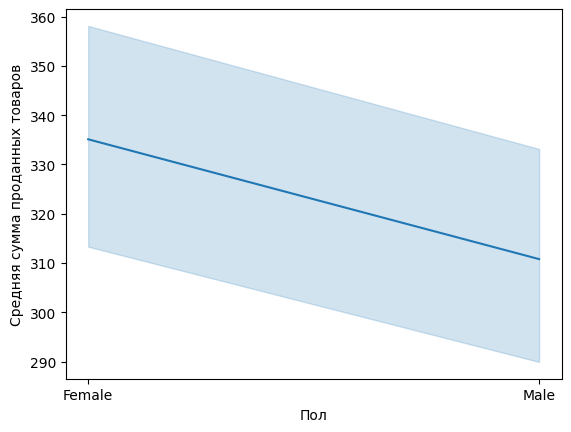

In [30]:
#Изменение показателей на отрезке другого параметра. Линейная диаграмма
sb.lineplot(data=df,x=df['Gender'],y=df['Total'])
plt.xlabel('Пол')
plt.ylabel('Средняя сумма проданных товаров')
plt.show()

Видим, что значения Total не сильно изменяются в зависимости от параметра Gender

In [37]:
#Преобразование колонки Date в формат datetime

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [64]:
#Рассчитать основные бизнес-метрики: общая выручка, средняя стоимость заказа и кол-во заказов по категориям(Product line)
#Общая выручка
total_revenue = df['Total'].sum()
print(f"Общая выручка:{round(total_revenue,2)}")
#AOV(средняя стоимость заказа)
aov = df['Total'].mean()
print(f'Средняя стоимость заказа:{round(aov,2)}')
#Кол-во заказов по категориям
#Найдем кол-во уник. значений в колонке Invoice ID
unuque_values_count = df['Invoice ID'].nunique()
#Найдем кол-во заказов по категориям
orders_by_category = df['Product line'].value_counts()
print(f'Число заказов по категориям: \n{orders_by_category}')



Общая выручка:322966.75
Средняя стоимость заказа:322.97
Число заказов по категориям: 
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64


Общая выручка:322966.75
Средняя стоимость заказа:322.97
Число заказов по категориям:
Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152

In [52]:
#Как объединить некоторые колонки по ID, оставит у качественных признаков прежние значения
agg_df = df.groupby('Invoice ID').agg({
    'Branch':'first',
    'City':'first',
    'Customer type':'first',
    'Gender':'first',
    'Product line':'first',
    'Unit price':'mean',
    'Quantity':'sum',
    'Tax 5%':'sum',
    'Total':'sum',
    'Date':'first',
    'Time':'first',
    'Payment':'first',
    'cogs':'sum',
    'gross margin percentage':'mean',
    'gross income':'sum',
    'Rating':'mean'}).reset_index()



In [62]:
#A/B Тест
#Формулирование гипотезы: H0 гласит, что люди с разным статусом тратят одинаковое кол-во денег
group_a = df[df['Customer type']=='Member']['Total']
group_b = df[df['Customer type']=='Normal']['Total']

#Проводит тест
t_stat, p_value = st.ttest_ind(group_a,group_b)
print(f'T-statistic:{round(t_stat,2)}, p-value: {round(p_value,2)}')

if p_value >0.05:
  print("Нулевая гипотеза(H0) подтверждена: люди с разным статусом тратят одинаковое кол-во денег")
else:
  print("Нулевая гипотеза(H0) отвергается и принимается альтернативная: есть статистически значимые различия в тратах у людей с разным статусом")

T-statistic:0.62, p-value: 0.53
Нулевая гипотеза(H0) подтверждена: люди с разным статусом тратят одинаковое кол-во денег


Нулевая гипотеза(H0) подтверждена: люди с разным статусом тратят одинаковое кол-во денег

In [63]:
#A/B Тест
#Формулирование гипотезы: H0 гласит, что мужчины и женщины тратят одинаковое кол-во денег
group_a_gender = df[df['Gender']=='Female']['Total']
group_b_gender = df[df['Gender']=='Male']['Total']

#Проводит тест
t_stat_gender, p_value_gender = st.ttest_ind(group_a_gender,group_b_gender)
print(f'T-statistic:{round(t_stat_gender,2)}, p-value: {round(p_value_gender,2)}')

if p_value_gender >0.05:
  print("Нулевая гипотеза(H0) подтверждена: мужчины и женщины тратят одинаковое кол-во денег")
else:
    print("Нулевая гипотеза(H0) отвергается и принимается альтернативная: есть статистически значимые различия в тратах у мужчин и женщин")

T-statistic:1.56, p-value: 0.12
Нулевая гипотеза(H0) подтверждена: мужчины и женщины тратят одинаковое кол-во денег


Нулевая гипотеза(H0) подтверждена: мужчины и женщины тратят одинаковое кол-во денег